<br>
# ** 6 Predict the Stock**
FB prophet

<br><br>
## ** 1 fb - prophet 모듈의 활용**
https://research.fb.com/prophet-forecasting-at-scale/

<br>
### ** 01 주가 데이터 가져오기**
> from pandas_datareader import get_data_yahoo

In [1]:
# from pandas_datareader import get_data_yahoo
# price = get_data_yahoo('005930.KS','2017-06-01')
# price = price.fillna('ffill')
# price = price.dropna()
# price.tail(3)

In [2]:
# 저장된 CSV 파일을 사용한다

import pandas as pd
price = pd.read_csv('./data/stock.csv')
price = price.set_index('Date')
price.index = pd.DatetimeIndex(price.index)
price.tail(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-06-07,51800.0,50500.0,51800.0,50600.0,13590016.0,50600.0
2018-06-08,50400.0,49600.0,50200.0,49650.0,16951706.0,49650.0
2018-06-11,50300.0,49350.0,49750.0,49900.0,10496083.0,49900.0


<br>
### ** 02 prophet 모델 만들기**

In [3]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [4]:
df         = price.reset_index()
df.head(3)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-06-01,44900.0,44400.0,44860.0,44680.0,9753500.0,11621.890625
1,2017-06-02,45960.0,45000.0,45060.0,45960.0,12488750.0,11954.835938
2,2017-06-05,46360.0,45720.0,46040.0,45940.0,7599400.0,11949.635742


In [5]:
df         = df[['Date', 'Close']]
df.head()

,Date,Close
0,2017-06-01,44680.0
1,2017-06-02,45960.0
2,2017-06-05,45940.0
3,2017-06-07,45300.0
4,2017-06-08,45160.0


In [6]:
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2017-06-01,44680.0
1,2017-06-02,45960.0
2,2017-06-05,45940.0
3,2017-06-07,45300.0
4,2017-06-08,45160.0


In [7]:
df['y']    = np.log(df['y'])
df.head()

,ds,y
0,2017-06-01,10.707281
1,2017-06-02,10.735527
2,2017-06-05,10.735091
3,2017-06-07,10.721062
4,2017-06-08,10.717967


In [8]:
m = Prophet(yearly_seasonality = True)
m

In [9]:
m.fit(df)
print('done')

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/markbaum/Python/python/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


done


<br>
### ** 03 예측 데이터 생성하기**
df_predict

In [10]:
num_days = 10
future   = m.make_future_dataframe(periods = num_days)
future[:10]

,ds
0,2017-06-01
1,2017-06-02
2,2017-06-05
3,2017-06-07
4,2017-06-08
5,2017-06-09
6,2017-06-12
7,2017-06-13
8,2017-06-14
9,2017-06-15


In [11]:
forecast = m.predict(future)
forecast.head(3)

/home/markbaum/Python/python/lib/python3.6/site-packages/fbprophet/forecaster.py:1010: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = seasonal_features.as_matrix()
/home/markbaum/Python/python/lib/python3.6/site-packages/fbprophet/forecaster.py:1134: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  seasonal = np.matmul(seasonal_features.as_matrix(), beta) * self.y_scale


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,2017-06-01,10.578918,10.679697,10.728664,10.578918,10.578918,0.125996,0.125996,0.125996,0.125996,0.125996,0.125996,-0.021996,-0.021996,-0.021996,0.147992,0.147992,0.147992,10.704913
1,2017-06-02,10.581885,10.682934,10.733725,10.581885,10.581885,0.125959,0.125959,0.125959,0.125959,0.125959,0.125959,-0.025025,-0.025025,-0.025025,0.150984,0.150984,0.150984,10.707844
2,2017-06-05,10.590786,10.700510,10.750767,10.590786,10.590786,0.134704,0.134704,0.134704,0.134704,0.134704,0.134704,-0.022469,-0.022469,-0.022469,0.157173,0.157173,0.157173,10.725490


In [12]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'seasonal', 'seasonal_lower', 'seasonal_upper', 'seasonalities',
       'seasonalities_lower', 'seasonalities_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper', 'yhat'],
      dtype='object')

/home/markbaum/Python/python/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


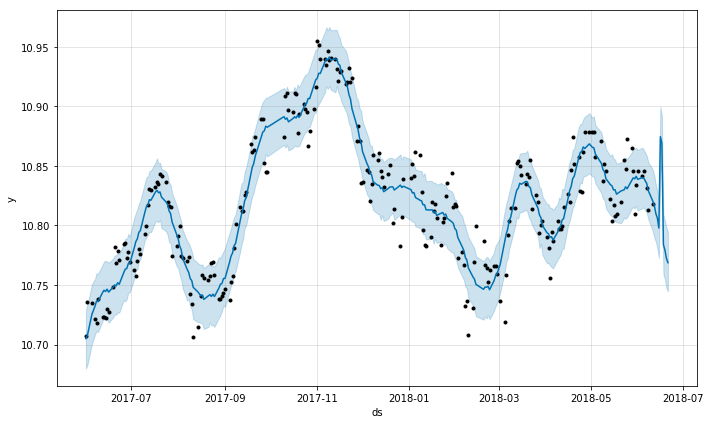

In [13]:
plt      = m.plot(forecast)
plt.show()

In [14]:
forecast.yhat[:10]

0    10.704913
1    10.707844
2    10.725490
3    10.732163
4    10.736504
5    10.736002
6    10.743617
7    10.745606
8    10.744545
9    10.746501
Name: yhat, dtype: float64

In [15]:
forecast['Close'] = round(np.exp(forecast.yhat), 2)

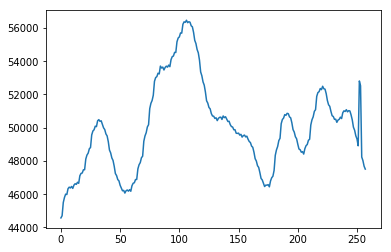

In [16]:
forecast.Close.plot()

In [17]:
df_predict = forecast.filter(['ds', 'Close'])
df_predict = df_predict.set_index('ds')
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 258 entries, 2017-06-01 to 2018-06-21
Data columns (total 1 columns):
Close    258 non-null float64
dtypes: float64(1)
memory usage: 4.0 KB


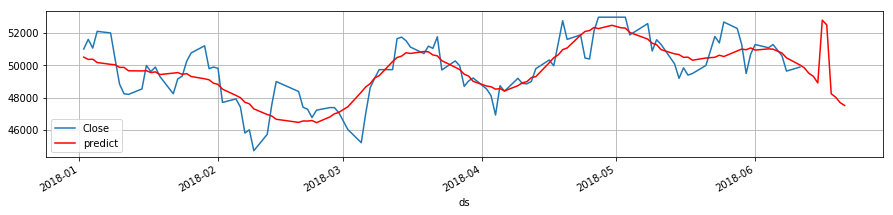

In [18]:
price.Close['2018'].plot(label='Close', figsize=(15,3), legend=True)
df_predict.Close['2018'].plot(label='predict', grid=True, color='red', legend=True)

<br>
### ** 03 결과 보고서 시각화**

/home/markbaum/Python/python/lib/python3.6/site-packages/fbprophet/forecaster.py:1010: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = seasonal_features.as_matrix()
/home/markbaum/Python/python/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


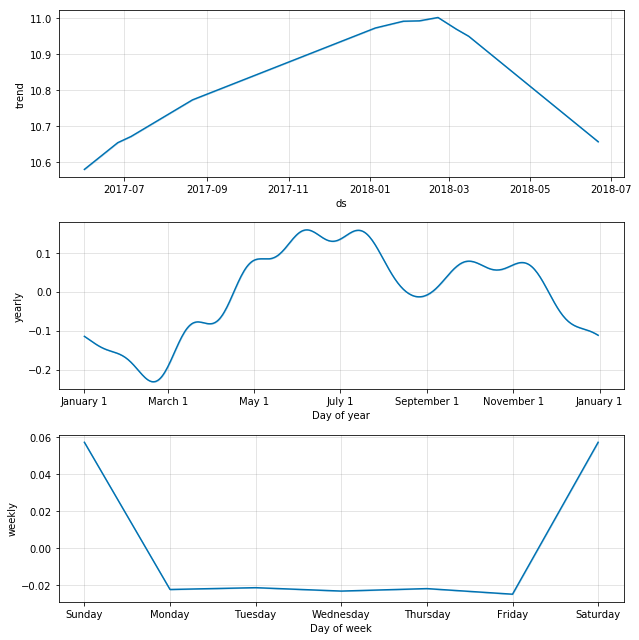

In [19]:
plt = m.plot_components(forecast)
plt.show()